In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [93]:
ds_train = pd.read_csv('Food_Train.csv')

In [94]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [95]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [96]:
ds_train.shape

(12690, 9)

In [97]:
ds_train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [98]:
ds_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

### HANGLING NAN VALUES

In [99]:
ds_train['CITY'] = ds_train['CITY'].replace(np.nan,'Unknown')

In [100]:
ds_train['VOTES'] = ds_train['VOTES'].fillna('20')

In [101]:
ds_train['LOCALITY'] = ds_train['LOCALITY'].replace(np.nan,'Blank')

In [102]:
ds_train['RATING'] = ds_train['RATING'].replace(np.nan,'3.2')

In [103]:
ds_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [104]:
ds_train['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'Unknown', 'India', 'Madhuranagar',
       'Chennai Teynampet', 'Faridabad', 'Chembur.', 'Maharashtra',
       'opp gurudwara Shakurpur', 'Telagana Land Line:040-48507016',
       'Ghaziabad', 'Karnataka', 'Kerala', 'Edappally', 'Kadavanthra',
       'Ernakulam Circle kochi', 'Bengalore', 'Near Reliance Fresh',
       'Kilpauk', 'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Kochi Elamkulam', 'Outer Ring Road',
       'Mulund East', 'Secunderabad main road near signal NMREC COLLEGE',
       'Telangana', 'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (N

## Handling Duplicate Entries

In [105]:
ds_train['CITY'].replace(['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                    '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034','BTM Layout','JP Nagar Bangalore',
                    'Whitefield Bangalore','Bangalore - 560076','Bangalore.','Banaswadi (Next to Indian Bank) Bangalore',
                    'BTM Bangalore','Bangalore Koramangala 7th Block','bangalore : 560085','Near Jyothinivas College'
                    'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                    'Karnataka 560043','Bangalore - 560103','Banglaore','Kanakapura Road Banglore','BTM 1st Stage',
                    'Marathahalli','Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore','Bangalore 560076',
                    'Bangalore Road','Karnataka','Karnataka 560103','SG Palya','Karnataka 560102','Karnataka 560037',
                    'B.B.M.P East (Karnataka) - 560049','Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                    'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                    'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout','Adjacent To Commercial Street',
                    'Vijaya Nagar','Sarjapur','Rajiv gandhi Nagar','Brigade Road','Thammenahalli Village',
                    'Near Munrshwara Temple','Off Brigade Road','Hosur Road','Opposite Barathi Gas Company','Indirapuram',
                    'Near Jyothinivas College','CPR layout harlur main road opposite to ozone ever green apartment Bangalore -'
                   ],'Bangalore',inplace=True)

In [106]:
ds_train['CITY'].replace(['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                    'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                    'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                    'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                    'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                    'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                    'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                    'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                    'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                    'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                    'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                    'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                    'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur','Sathya Nagar',
                    'Nallathambi Main Road','Andavar Nagar','Nallala Street'],'Chennai', inplace=True)

In [107]:
ds_train['CITY'].replace(['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                    'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                    'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                    'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                    'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                    'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills','Madhuranagar','Kothaguda','Mehdipatnam',
                    'Gandipet','Khairatabad','Behind Ramalayam Temple','West Maredpally','Kukatpally','Lingampally',
                    'Kukatapally','Serilingampally','Attapur.','Dilsukhnagar','Sriram nagar','ECIL','Champapet',
                    'Beside Excellency Gardens','Begumpet','Maharaja Hotel Beside Gardania Bar','Narayanguda',
                    'Himayath Nagar','TCS Synergy park','Manikonda','Lahari Apartments','Haridwar Apartments','Ramanthapur',
                    '10th avenue', 'Uppal','Nizampet','Near Reliance Fresh', 'Thykoodam', 'chullickal', 'Nedumbassery',
                    'B-1 Stage', 'Aluva', 'Citypark', 'Aluva Circle', 'ward X11','Perumbavoor', 'Near Bharat Petroleum.',
                    '3rd Street','Pallimukku', 'Trivandrum', 'Thevera', 'Old Railway Road','1st Stage', 'First Street',
                    'Block F', 'Kalamassery','Veliaveetil house Vivekananda Nagar Elamakkara', 'Tripunithura',
                    'aluva circle', 'Mig Housing Society', 'Masab Tank'],'Hyderabad',inplace=True)

In [108]:
ds_train['CITY'].replace(['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                    'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal','Kochi-683101',
                    'p.o Kochi','Kerala 683104','Kerala 682013','MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram',
                    'Kerala 690525','Kochi-18','MG Road Ernakulam','Kochi Kakkanad','Kochi International Airport VIP Road',
                    'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi','Kochi Aluva 102', 'Kerala 682024',
                    'Kochi','Kakkanad','Kaloor','Palarivattom','Kochi-16','682036','682035','Kadavanthra','682035.','kochi',
                    'Vyttila','Panampilly Nagar','Elamakkara','Kochi.'],'Kochi',inplace=True)

In [109]:
ds_train['CITY'].replace(['Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE','Secunderabad ECIL',
                    'Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.',
                    'Metro Pillar No 21. Mettuguda main road near railway degree college.','Secunderabad'],
                    'Secunderabad',inplace=True)

In [110]:
ds_train['CITY'].replace(['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                    'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                    'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                    'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                    'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                    'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                    'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                    'Powai','Malad East','Goregaon West','Mulund East','Powai (Next to Powai Plaza)',
                    'Outer Ring Road','Chembur.','Dombivali East','Kandivali', 'Kalyan West','Grant Road West',
                    'Naya Nagar Mira Road', 'Lower Parel', 'HBR Layout','Virar West','Marine Drive','Bhayandar',
                    'Khar (west)','khar west', 'Mahim','Vasai West.','Mira raod east','Pokhran Road 2','Banjara Hills',
                    'Borivali East.','Bandra W','Borivali West','opp mukteshwar ashram powai','Kalyan','Wagle Estate',
                    'Badlapur West.','Lower Parel West','Mulund west','Borivali West.','Vasai west','Rajanpada',
                    'Near Shangrilla Bus Stop', 'Road 3','Palm Beach Road','India'],'Mumbai',inplace=True)

In [111]:
ds_train['CITY'].replace(['New Delhi','Delhi','Chander Nagar New Delhi','New Delhi.','New Delhi-110024',
                    'Greater Kailash 2 New Delhi','Amrit kaur market opposite new delhi railway station paharganj',
                    'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075','Janakpuri',
                    'Dist. Center New Delhi','opp gurudwara Shakurpur','Rohini', 'Karol Bagh','Dwarka','Pitampura',
                    '6 & 7 - 4/64 Subhash Nagar','Sector 7 Dwarka','PVR plaza cinema building Connaught Place',
                    'Saket','Near Ramlila Ground','IOB Bank Kamala Nagar','Ashok Vihar Phase 1',],'New Delhi',inplace=True)

In [112]:
ds_train['CITY'].replace(['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida','Faridabad','Ghaziabad','Faridabd',
                    'Uttar Pradesh', 'Naharpar','Vaishali Ghaziabad'],'Delhi NCR',inplace=True)

In [113]:
ds_train['CITY'].replace(['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana','MG Road','Haryana','Gurugram'
                    'Golf Course Road','DLF Galleria','Rodeo Drive Sector 49','Sector 51','Sector 1','Golf Course Road'],
                    'Gurgaon',inplace=True)

In [114]:
ds_train['CITY'].unique()

array(['Mumbai', 'Chennai', 'Bangalore', 'Gurgaon', 'Hyderabad', 'Kochi',
       'New Delhi', 'Delhi NCR', 'Secunderabad', 'Unknown', 'Gurugram'],
      dtype=object)

In [115]:
ds_train['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [116]:
ds_train.groupby('CITY')['COST'].describe()

,count,mean,std,min,25%,50%,75%,max
CITY,,,,,,,,
Bangalore,2258.0,668.161647,631.732226,100.0,300.0,500.0,800.0,14000.0
Chennai,2255.0,590.039911,561.073132,50.0,300.0,400.0,650.0,5500.0
Delhi NCR,438.0,578.812785,456.127322,100.0,300.0,450.0,650.0,3800.0
Gurgaon,390.0,845.769231,736.202162,100.0,400.0,550.0,1200.0,5500.0
Gurugram,7.0,642.857143,556.348640,100.0,350.0,500.0,700.0,1800.0
Hyderabad,1930.0,592.224352,512.619939,60.0,300.0,450.0,700.0,8000.0
Kochi,1369.0,429.962747,389.843985,20.0,200.0,300.0,500.0,4500.0
Mumbai,2252.0,839.320604,762.235443,50.0,400.0,600.0,1000.0,10000.0
New Delhi,1364.0,776.994135,766.823290,50.0,300.0,500.0,962.5,5500.0


In [117]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


# Expanding Columns

In [118]:
# Extracting text from column
ds_train['VOTES'] = ds_train.VOTES.str.split(expand=True,pat=" ")

In [119]:
ds_train['VOTES'].head()

0     49
1     30
2    221
3     24
4    165
Name: VOTES, dtype: object

In [120]:
ds_train['VOTES'] = ds_train['VOTES'].astype(int)

In [121]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  int32 
 8   COST           12690 non-null  int64 
dtypes: int32(1), int64(2), object(6)
memory usage: 842.8+ KB


In [122]:
ds_train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.2', '3.0', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [123]:
ds_train['RATING'] = ds_train['RATING'].replace('-','3.5')

In [124]:
ds_train['RATING'] = ds_train['RATING'].replace('NEW','3.5')

In [125]:
ds_train['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4',
       '3.5', '4.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.2', '3.0', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [126]:
ds_train['RATING'] = ds_train['RATING'].astype(float)

In [127]:
#ds_train['VOTE_RATE'] = ds_train['RATING'] * ds_train['VOTES']

In [128]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Mumbai,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [129]:
ds_train = ds_train.drop('TIME',axis = 1)

In [130]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165,300


In [131]:
dscorr = ds_train.corr()

<AxesSubplot:>

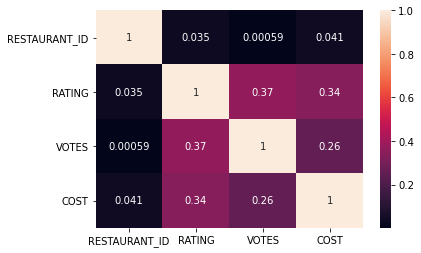

In [132]:
sns.heatmap(dscorr,annot = True)

In [133]:
ds_train.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Mumbai,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165,300


In [134]:
ds_train['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [135]:
# Extracting text from column
ds1 = ds_train.CUISINES.str.split(expand=True,pat=",")

In [136]:
ds1.head()

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,None,None,None,None,None
1,Asian,Modern Indian,Japanese,None,None,None,None,None
2,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Tibetan,Chinese,None,None,None,None,None,None
4,Desserts,None,None,None,None,None,None,None


In [137]:
ds1.isnull().sum()

0        0
1     3062
2     6999
3     9995
4    11675
5    12276
6    12514
7    12613
dtype: int64

In [138]:
ds1= ds1.replace(np.nan,'Blank')

In [139]:
ds1.head()

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,Blank,Blank,Blank,Blank,Blank
1,Asian,Modern Indian,Japanese,Blank,Blank,Blank,Blank,Blank
2,North Indian,Chinese,Biryani,Hyderabadi,Blank,Blank,Blank,Blank
3,Tibetan,Chinese,Blank,Blank,Blank,Blank,Blank,Blank
4,Desserts,Blank,Blank,Blank,Blank,Blank,Blank,Blank


In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds1.columns:
    if ds1[column].dtype == np.number:
        continue
    ds1[column] = le.fit_transform(ds1[column])

In [141]:
ds1 = ds1.astype(int)

In [142]:
# Extracting text from column
ds2 = ds_train.TITLE.str.split(expand=True,pat=",")

In [143]:
ds2= ds2.replace(np.nan,'Blank')

In [144]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds2.columns:
    if ds2[column].dtype == np.number:
        continue
    ds2[column] = le.fit_transform(ds2[column])

In [145]:
ds2 = ds2.astype(int)

In [146]:
ds_train = ds_train.drop(['TITLE','CUISINES'],axis=1)

In [147]:
ds_train = pd.concat([ds_train,ds1,ds2],axis=1)

In [148]:
ds_train.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,0,1,2,3,4,5,6,7,0,1
0,9438,Mumbai,Dombivali East,3.6,49,1200,59,32,66,85,78,69,47,19,4,3
1,13198,Chennai,Ramapuram,4.2,30,1500,6,60,41,85,78,69,47,19,4,1
2,10915,Chennai,Saligramam,3.8,221,800,72,23,12,32,78,69,47,19,4,3
3,6346,Mumbai,Bandra West,4.1,24,800,100,23,93,85,78,69,47,19,21,3
4,15387,Mumbai,Lower Parel,3.8,165,300,28,98,93,85,78,69,47,19,8,3


In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ds_train['CITY'] = le.fit_transform(ds_train['CITY'])
ds_train['LOCALITY'] = le.fit_transform(ds_train['LOCALITY'])

In [150]:
ds_train.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,0,1,2,3,4,5,6,7,0,1
0,9438,7,286,3.6,49,1200,59,32,66,85,78,69,47,19,4,3
1,13198,1,1047,4.2,30,1500,6,60,41,85,78,69,47,19,4,1
2,10915,1,1102,3.8,221,800,72,23,12,32,78,69,47,19,4,3
3,6346,7,136,4.1,24,800,100,23,93,85,78,69,47,19,21,3
4,15387,7,621,3.8,165,300,28,98,93,85,78,69,47,19,8,3


In [152]:
ds_train = ds_train.astype(int)

In [153]:
ds_train.skew()

RESTAURANT_ID     0.006947
CITY             -0.117542
LOCALITY          0.348139
RATING            0.094125
VOTES            14.563311
COST              3.978801
0                 0.026008
1                 0.055174
2                -0.823537
3                -2.108741
4                -4.094366
5                -6.854150
6               -10.250522
7               -13.749110
0                 0.087325
1                 4.615460
dtype: float64

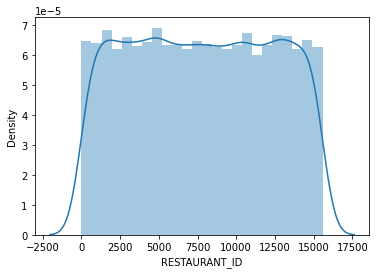

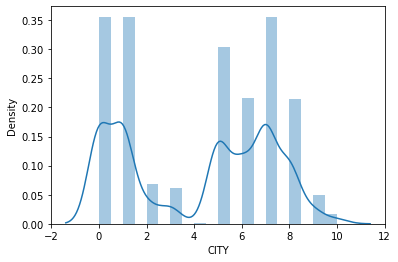

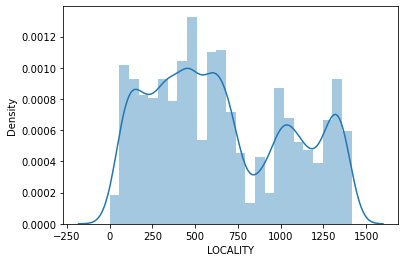

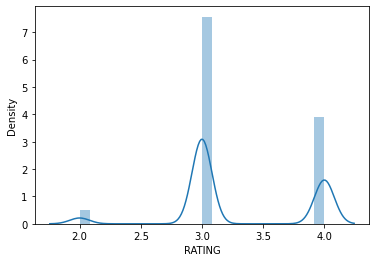

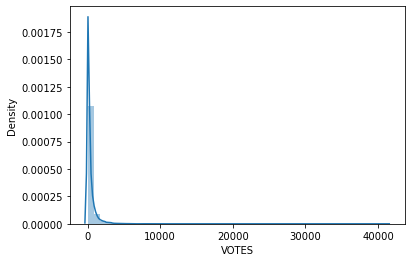

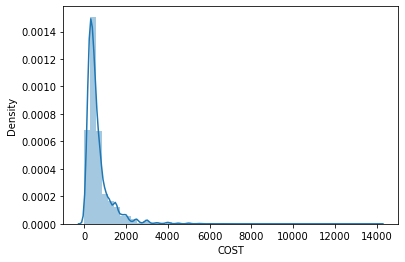

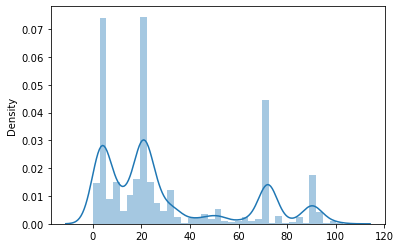

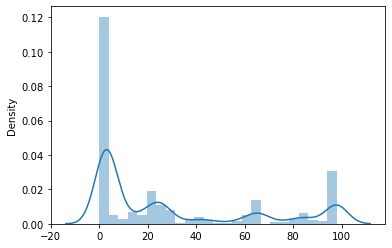

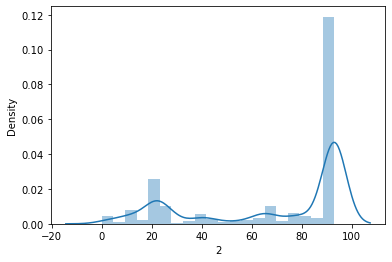

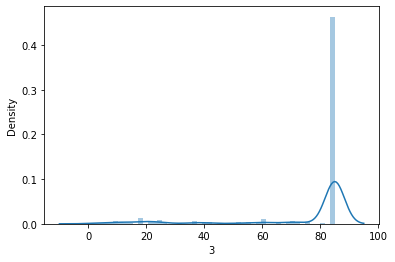

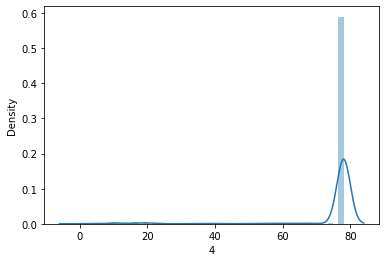

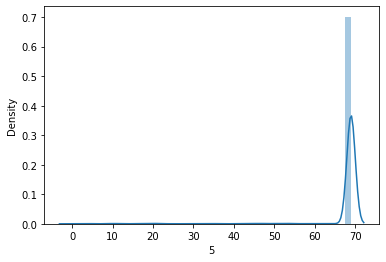

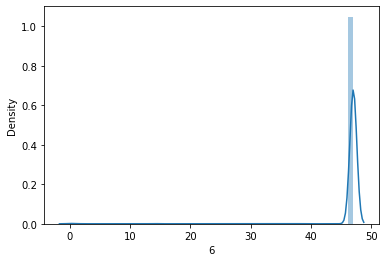

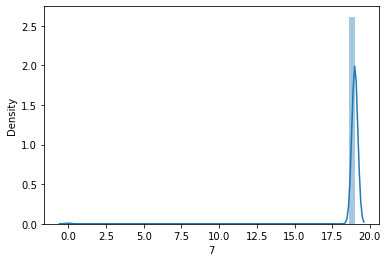

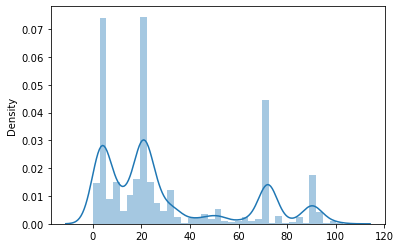

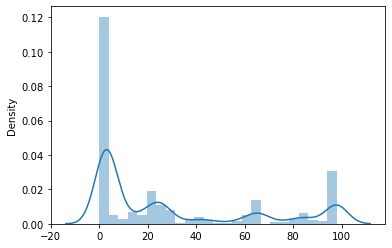

In [154]:
for i in ds_train.columns:
    sns.distplot(ds_train[i])
    plt.show()

In [155]:
from scipy.stats import zscore

In [156]:
z=np.abs(zscore(ds_train))
z

array([[0.37269233, 0.92409415, 0.91391699, ..., 0.07470174, 0.91929951,
        0.1896529 ],
       [1.20737672, 1.03003928, 0.98624404, ..., 0.07470174, 0.91929951,
        0.92351332],
       [0.70057234, 1.03003928, 1.12357499, ..., 0.07470174, 0.91929951,
        0.1896529 ],
       ...,
       [0.74896628, 0.92409415, 1.72533427, ..., 0.07470174, 0.29616541,
        0.1896529 ],
       [0.36076439, 1.03003928, 0.04998044, ..., 0.07470174, 0.91929951,
        0.1896529 ],
       [0.29505519, 0.27271634, 1.70286193, ..., 0.07470174, 0.91929951,
        0.1896529 ]])

In [157]:
threshold=3
print(np.where(z>3))

(array([    6,    15,    19, ..., 12668, 12671, 12683], dtype=int64), array([10, 15, 15, ..., 12, 15, 15], dtype=int64))


In [158]:
ds_new=ds_train[(z<3).all(axis=1)]
ds_new

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,0,1,2,3,4,5,6,7,0,1
0,9438,7,286,3,49,1200,59,32,66,85,78,69,47,19,4,3
1,13198,1,1047,4,30,1500,6,60,41,85,78,69,47,19,4,1
2,10915,1,1102,3,221,800,72,23,12,32,78,69,47,19,4,3
3,6346,7,136,4,24,800,100,23,93,85,78,69,47,19,21,3
4,15387,7,621,3,165,300,28,98,93,85,78,69,47,19,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,13228,5,343,3,546,500,72,17,44,85,78,69,47,19,21,3
12686,9686,7,133,4,1214,1800,37,25,93,85,78,69,47,19,4,1
12687,11133,7,1343,4,608,1300,34,25,4,18,78,69,47,19,14,3
12688,6134,1,632,3,32,400,72,84,21,76,78,69,47,19,4,3


%age loss after removal of outliers is approx 12% which is not ok. We can't use new dataset.

In [159]:
ds_train.skew()

RESTAURANT_ID     0.006947
CITY             -0.117542
LOCALITY          0.348139
RATING            0.094125
VOTES            14.563311
COST              3.978801
0                 0.026008
1                 0.055174
2                -0.823537
3                -2.108741
4                -4.094366
5                -6.854150
6               -10.250522
7               -13.749110
0                 0.087325
1                 4.615460
dtype: float64

In [160]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [161]:
x = ds_train.drop('COST',axis = 1)

In [162]:
y = ds_train['COST']

In [163]:
from sklearn.preprocessing import power_transform

In [164]:
x = power_transform(x,method='yeo-johnson')

In [165]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [166]:
model = [RandomForestRegressor()]

max_r2score=0
for ran_state in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=ran_state)
    for i in model:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        r2_sco=r2_score(y_test,y_pred)
        if r2_sco > max_r2score:
            max_r2score = r2_sco
            final_state = ran_state
            final_model= i
        

print('max r2_score with random_state',final_state,'is',max_r2score,'and model is',final_model)

KeyboardInterrupt: 

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=46)

In [168]:
model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Score of',m,'is',score)
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
    print('R2_Score:',r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is 0.20863722412009134
MAE : 328.9959783436202
MSE: 312742.0842534443
RSME: 18.138246286331547
R2_Score: 0.21608756479599778
*************************************************************************************************************


Score of DecisionTreeRegressor() is 1.0
MAE : 259.3435776201734
MSE: 209644.94483845547
RSME: 16.104147838993946
R2_Score: 0.4745085886703384
*************************************************************************************************************


Score of RandomForestRegressor() is 0.9557865372571388
MAE : 192.77823089046493
MSE: 97561.7943965721
RSME: 13.884460050375202
R2_Score: 0.7554537502976089
*************************************************************************************************************


Score of KNeighborsRegressor() is 0.527275298495874
MAE : 290.28526398739166
MSE: 262901.8620961387
RSME: 17.037759946289643
R2_Score: 0.34101597030850783
**********************************************************

In [84]:
model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    score = cross_val_score(m,x,y,cv= 10,scoring = 'r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation:',score.std())
    print('*************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.25477291 0.13188422 0.18098352 0.23000272 0.20355434 0.24300045
 0.21223004 0.21138822 0.24687082 0.21922225]
Mean Score : 0.21339094951766366
Standard Deviation: 0.03437404856526688
*************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [0.49771394 0.35453408 0.56080691 0.55628132 0.47156386 0.43186834
 0.45068244 0.32765078 0.53257331 0.54691499]
Mean Score : 0.47305899922294226
Standard Deviation: 0.07849936213749754
*************************************************************************************************************


Model: RandomForestRegressor()
Score: [0.75033798 0.55592847 0.71735259 0.76496619 0.74763725 0.64924239
 0.67479926 0.68422311 0.75698033 0.75233184]
Mean Score : 0.705379940893696
Standard Deviation: 0.06264008775931346
*************************************************************************************************************



## RANDOM FOREST REGRESSOR IS GIVING THE BEST SCORE AND R2 SCORE SO I CHOOSE IT AS FINAL MODEL.

Using GridSearchCV to find best parameters

In [169]:
rfr=RandomForestRegressor()

rfrpara={
    
    "n_estimators": [600,700],
    "max_depth":[30],
    
}

rfrgrid=GridSearchCV(rfr,param_grid=rfrpara,cv=10,n_jobs=-1)

rfrgrid.fit(x_train,y_train)
rfrgrid.best_score_

0.6946031204617296

In [170]:
rfrgrid.best_params_

{'max_depth': 30, 'n_estimators': 600}

In [172]:
rf=RandomForestRegressor(max_depth = 30, n_estimators = 700)
rf.fit(x_train,y_train)
score = rf.score(x_train,y_train)
predm = rf.predict(x_test)
print('Score of',rfr,'is',score)
print('MAE :',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
print('R2_Score:',r2_score(y_test,predm))
print('*************************************************************************************************************')
print('\n')

Score of RandomForestRegressor(max_depth=30, n_estimators=700) is 0.9571636442354028
MAE : 191.6681704468913
MSE: 97591.91240207528
RSME: 13.84442741491649
R2_Score: 0.7553782571669232
*************************************************************************************************************




## BEFORE HYPERPARAMETRER TUNING R2 SCORE = 75.54

## BEFORE HYPERPARAMETRER TUNING R2 SCORE = 75.53

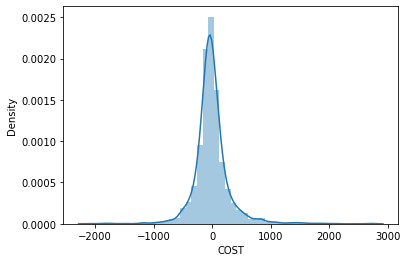

In [173]:
# plotting distribution plot
sns.distplot(y_test-predm)
plt.show()

In [174]:
import pickle

In [175]:
finalmodel = 'Foodprice_train.pkl'
pickle.dump(rf, open(finalmodel, 'wb'))

### LOADING TEST DATA

In [254]:
ds_test = pd.read_csv('Food_Test.csv')

In [255]:
ds_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [256]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [257]:
ds_test.shape

(4231, 8)

In [258]:
ds_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [259]:
ds_test['CITY'] = ds_test['CITY'].replace(np.nan,'Unknown')

ds_test['VOTES'] = ds_test['VOTES'].fillna('20')

ds_test['LOCALITY'] = ds_test['LOCALITY'].replace(np.nan,'Blank')

ds_test['RATING'] = ds_test['RATING'].replace(np.nan,'3.2')

In [260]:
ds_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [261]:
ds_test['CITY'].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad',
       'Navi Mumbai', 'Chennai', 'New Delhi', 'Bangalore', 'Vasai Mumbai',
       'Gurgaon', 'Palarivattom', 'Delhi', 'Ernakulam', 'Thane West',
       'Ghaziabad', 'Chennai.', 'Thane', 'Telangana', 'Bandra West',
       'Potheri', 'Panathur Main Road', 'Secunderabad', 'Unknown',
       'JP Nagar', 'Near Andheri West Station',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'Bengaluru', 'APR Chambers', 'Tamil Nadu 600102', 'Andheri West',
       'India', 'Serilingampally', 'Maharashtra.', 'Gandhinagar Rd',
       'Near Andheri East Station', 'HSR Layout', 'Greater Noida',
       'Uttar Pradesh', 'Dwarka', 'Velachery', 'Anna Nagar West',
       'Indiranagar', 'Whitefield', 'Kochi Ravipuram', 'Kerala 682036',
       'Madhapur', 'Hyderabad.', 'Mira Road Thane Mumbai',
       'India Gate New Delhi', 'Bangalore - 560095', '1st Stage',
       'Sholinganallur. Chennai', 'Chennai (Above Bombay Brasserie)',
 

In [262]:
ds_test['CITY'].replace(['Bangalor','Bangalore-560066','Bengalore','Bengaluru','Banglore',
                    '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034','BTM Layout','JP Nagar Bangalore',
                    'Whitefield Bangalore','Bangalore - 560076','Bangalore.','Banaswadi (Next to Indian Bank) Bangalore',
                    'BTM Bangalore','Bangalore Koramangala 7th Block','bangalore : 560085','Near Jyothinivas College'
                    'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                    'Karnataka 560043','Bangalore - 560103','Banglaore','Kanakapura Road Banglore','BTM 1st Stage',
                    'Marathahalli','Bangalore land mark above mahaveer hard ware','Phase 1 Bangalore','Bangalore 560076',
                    'Bangalore Road','Karnataka','Karnataka 560103','SG Palya','Karnataka 560102','Karnataka 560037',
                    'B.B.M.P East (Karnataka) - 560049','Malleshwaram Bangalore', 'Kadubesanahalli Bangalore',
                    'Mahadevpura','NEW BEL ROAD 560054','JP Nagar','Rajarajeshwari Nagar bangalore',
                    'Ulsoo','1st Tavarekere','Thanisandra','Indiranagar','HSR Layout','Adjacent To Commercial Street',
                    'Vijaya Nagar','Sarjapur','Rajiv gandhi Nagar','Brigade Road','Thammenahalli Village',
                    'Near Munrshwara Temple','Off Brigade Road','Hosur Road','Opposite Barathi Gas Company','Indirapuram',
                    'Near Jyothinivas College','CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
                    'Panathur Main Road','opposite to western side of ITPL Service gate','Whitefield','Bangalore - 560095',
                    'BTM','Dombivli','Sahakara Nagar','Tavarekere Main Road'],'Bangalore',inplace=True)

In [263]:
ds_test['CITY'].replace(['Chennai Teynampet','Tamil Nadu','Besant Nagar','Arumbakkam chennai-600106.',
                    'Avadi', 'Velachery','Pallavaram','Chennai 600034.','Chennai - 600040', 'Perungudi',
                    'Chennai Padur', 'Medavakkam', 'Chennai Kovalam', 'Chennai opp: Vasanth & co',  
                    'Mogappair. Chennai', 'Chennai Perungudi', 'Chennai Thuraipakkam', 'OMR Karapakkam',
                    'Chennai Thousand Lights',  'Chennai- 600107', 'ECR NEELANKARAI Chennai 600115',
                    'Chennai.', 'Chennai (Bang Opposite Indian Bank)','Chennai Opposite 5C Bus stand', 
                    'Mahabalipuram', 'Chennai Mahabalipuram', 'Nungambakkam','Chennai-40',
                    'East Coast Road (ECR)', 'Ramapuram', 'Chennai Chrompet','Nandanam','Thiruvanmiyur', 
                    'Ambattur','Chennai - 34 Landmark - Near Loyola College', 'Anna Nagar West', 
                    'Anna Salai','Chenn ai', 'Perambur', 'Vadapalani','Palavakkam','Sholinganallur',
                    'Mogappair', 'Ashok Nagar', 'Chennai. (Near Hotel Matshya)',  'Chromepet',
                    'chennai','Tambaram','Vadapalani', 'Anna Nagar East','Kilpauk','Potheri',
                    'GST Road', 'Vadapalani.','Semmancheri','Dewan Rama Road','Navallur','Kolathur','Sathya Nagar',
                    'Nallathambi Main Road','Andavar Nagar','Nallala Street','Tamil Nadu 600102','Sholinganallur. Chennai',
                    'Chennai (Above Bombay Brasserie)','Chennai 37', 'Vandalur','Chennai 40','MM Nagar','Chennai 600040',
                    'Kaaraikudi Complex','Thiruvanmiyur (Opp Eurokids LB Road)','Chennai Velachery','Chennai-600008','Chepauk',
                    'Balavinayagar Nagar Chennai','RA Puram','Chennai Injambakkam','T-Nagar Chennai','Chenna','chennai-119',
                    'Chennai - 600018'   ],'Chennai', inplace=True)

In [264]:
ds_test['CITY'].replace(['Telagana Land Line:040-48507016', 'Telangana','Gachibowli','Kondapur', 'Madhapur',
                    'Hyderabad Behind Vacs Pastries','Hyderabad neerus emporium.', 'Hitech City',
                    'Telangana 500003','Hyderabad.', 'Telangana 500034','Telangana 500032',
                    'Hyderabad-500032','Near Santosh Banjara Hyderabad','Gachibowli Hyderabad',
                    'hyderabad', 'Telengana','Telangana 500081','Kondapur.',  'Telangana 500070',
                    'Begumpet Hyderabad','Hyderabad Manikonda','Jubilee Hills','Madhuranagar','Kothaguda','Mehdipatnam',
                    'Gandipet','Khairatabad','Behind Ramalayam Temple','West Maredpally','Kukatpally','Lingampally',
                    'Kukatapally','Serilingampally','Attapur.','Dilsukhnagar','Sriram nagar','ECIL','Champapet',
                    'Beside Excellency Gardens','Begumpet','Maharaja Hotel Beside Gardania Bar','Narayanguda',
                    'Himayath Nagar','TCS Synergy park','Manikonda','Lahari Apartments','Haridwar Apartments','Ramanthapur',
                    '10th avenue', 'Uppal','Nizampet','Near Reliance Fresh', 'Thykoodam', 'chullickal', 'Nedumbassery',
                    'B-1 Stage', 'Aluva', 'Citypark', 'Aluva Circle', 'ward X11','Perumbavoor', 'Near Bharat Petroleum.',
                    '3rd Street','Pallimukku', 'Trivandrum', 'Thevera', 'Old Railway Road','1st Stage', 'First Street',
                    'Block F', 'Kalamassery','Veliaveetil house Vivekananda Nagar Elamakkara', 'Tripunithura',
                    'aluva circle', 'Mig Housing Society', 'Masab Tank','APR Chambers','Mehdipatnam Hyderabad', 'Nallagandla',
                    'Tolichowki', 'Hyderaba', 'Alwarpet','Suraram','Forum Sujana Mall Opposite to Malaysian township',
                    'Old Hafeezpet','Yousufguda','Hyderabad.Star hypermarket opposite side Service road','Habsiguda',
                    'Telangana 500027','Vanasthalipuram',   ],'Hyderabad',inplace=True)

In [265]:
ds_test['CITY'].replace(['Kerala', 'Edappally','Ernakulam Circle kochi','Kochi Elamkulam','Ponnuruni Kochi', 
                    'Kochi Vyttila', 'Kochi Palarivattom','Ernakulam', 'Kochi Chullickal','Kochi-683101',
                    'p.o Kochi','Kerala 683104','Kerala 682013','MALAPALLIPURAM P .O THRISSUR','Kochi Ravipuram',
                    'Kerala 690525','Kochi-18','MG Road Ernakulam','Kochi Kakkanad','Kochi International Airport VIP Road',
                    'Kerala 682001 India', 'Kerala 683585', 'Kerala 682304','Fort Kochi','Kochi Aluva 102','Kerala 682024',
                    'Kochi','Kakkanad','Kaloor','Palarivattom','Kochi-16','682036','682035','Kadavanthra','682035.','kochi',
                    'Vyttila','Panampilly Nagar','Elamakkara','Kochi.','Kerala 682036','682024','Kochi Panampilly Nagar',
                    'Chittethukkara','Community Centre','Kerala 682022','Kerala 682305','Kerala 682015','Kerala 682018',
                    'Kerala 682028','Kerala 682021','KK Road','Shihab Thangal Road'],'Kochi',inplace=True)

In [266]:
ds_test['CITY'].replace(['Secunderabad', 'Secunderabad main road near signal NMREC COLLEGE','Secunderabad ECIL',
                    'Secunderabad. WE HAVE NO BRANCHES.','Secunderabad.',
                    'Metro Pillar No 21. Mettuguda main road near railway degree college.','Secunderabad','Secunderbad'],
                    'Secunderabad',inplace=True)

In [267]:
ds_test['CITY'].replace(['Mumbai','Navi Mumbai','Mumbai Mahim','Navi Mumbai.', 'Mumbai - 400007',
                    'Mumbai.','Mumbai Andheri East','Mumbai Dombivali East','navi mumbai',
                    'Mumbai - 400013','West Mumbai','Andheri west Mumbai','Mumbai Chakala',
                    'BK Guda', 'Jogeshwari (w) Mumbai','Mumbai - 80','East Mumbai','Navi-Mumbai',
                    'Mumbai This is a Delivery & Take-away Restaurant only.','Thane Mumbai',
                    'Khar Mumbai','Andheri Lokhandwala','Andheri West','Andheri Lokhandwala.',
                    'Thane','Thane West','Thane (W)','Maharashtra','Maharashtra 400102','Bandra West',
                    'Powai','Malad East','Goregaon West','Mulund East','Powai (Next to Powai Plaza)',
                    'Outer Ring Road','Chembur.','Dombivali East','Kandivali', 'Kalyan West','Grant Road West',
                    'Naya Nagar Mira Road', 'Lower Parel', 'HBR Layout','Virar West','Marine Drive','Bhayandar',
                    'Khar (west)','khar west', 'Mahim','Vasai West.','Mira raod east','Pokhran Road 2','Banjara Hills',
                    'Borivali East.','Bandra W','Borivali West','opp mukteshwar ashram powai','Kalyan','Wagle Estate',
                    'Badlapur West.','Lower Parel West','Mulund west','Borivali West.','Vasai west','Rajanpada',
                    'Near Shangrilla Bus Stop', 'Road 3','Palm Beach Road','India','Vasai Mumbai','Near Andheri West Station',
                    'Maharashtra.','Mira Road Thane Mumbai','Near Andheri East Station','Marad','Maharashtra 400092',
                    'Kurla (W)', 'Mumbai 400015', 'Thane West Thane West','Mulund West','Mumbai 400070','Miumbai',
                    'Mohammad Ali Road Mumbai','Virar Mumbai','Mumbai Veera Desai Area','Mumbai Ulhasnagar',
                    'Jogeshwari West Mumbai','Chowpatty', 'Church Street','Mumbai Mumbra','Kurla Mumbai','Kandivali West',
                    'Borivali (W) Mumbai: 400 092.','Opposite Ellora Building'],'Mumbai',inplace=True)

In [268]:
ds_test['CITY'].replace(['New Delhi','Delhi','Chander Nagar New Delhi','New Delhi.','New Delhi-110024',
                    'Greater Kailash 2 New Delhi','Amrit kaur market opposite new delhi railway station paharganj',
                    'Delhi 110085','Old Delhi','New Delhi..Near by SBI bank','New Delhi 110075','Janakpuri',
                    'Dist. Center New Delhi','opp gurudwara Shakurpur','Rohini', 'Karol Bagh','Dwarka','Pitampura',
                    '6 & 7 - 4/64 Subhash Nagar','Sector 7 Dwarka','PVR plaza cinema building Connaught Place',
                    'Saket','Near Ramlila Ground','IOB Bank Kamala Nagar','Ashok Vihar Phase 1','Kalkaji','Gandhinagar Rd',
                    'India Gate New Delhi','Greater Kailash 1 (GK 1) New Delhi','Delh.','New Delhi 110011',
                        ],'New Delhi',inplace=True)

In [269]:
ds_test['CITY'].replace(['Noida','Sector 51 Noida','Greater Noida','Near Sector 110 Noida','Faridabad','Ghaziabad','Faridabd',
                    'Uttar Pradesh', 'Naharpar','Vaishali Ghaziabad','Sector-6 Noida 201301','Noida Extention',
                        ],'Delhi NCR',inplace=True)

In [270]:
ds_test['CITY'].replace(['Gurgaon','Gurgoan','Gurgaon Haryana India','Gurgaon Haryana','MG Road','Haryana','Gurugram'
                    'Golf Course Road','DLF Galleria','Rodeo Drive Sector 49','Sector 51','Sector 1','Golf Course Road',
                    'Gurugram', 'Girgaum','Near Sector 34',                  ],'Gurgaon',inplace=True)

In [271]:
ds_test['CITY'].unique()

array(['Delhi NCR', 'Mumbai', 'Kochi', 'Hyderabad', 'Chennai',
       'New Delhi', 'Bangalore', 'Gurgaon', 'Secunderabad', 'Unknown'],
      dtype=object)

In [272]:
# Extracting text from column
ds_test['VOTES'] = ds_test.VOTES.str.split(expand=True,pat=" ")

ds_test['VOTES'] = ds_test['VOTES'].astype(int)

In [273]:
ds_test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [274]:
ds_test['RATING'] = ds_test['RATING'].replace('-','3.5')

ds_test['RATING'] = ds_test['RATING'].replace('NEW','3.5')

In [275]:
ds_test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', '3.5', '4.0', '3.4', '3.2',
       '4.1', '3.0', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5', '2.8',
       '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7', '2.3',
       '2.4', '2.2'], dtype=object)

In [276]:
ds_test['RATING'] = ds_test['RATING'].astype(float)

In [277]:
#ds_test['VOTE_RATE'] = ds_test['RATING'] * ds_test['VOTES']

In [278]:
ds_test = ds_test.drop('TIME',axis = 1)

In [279]:
# Extracting text from column
ds1 = ds_test.CUISINES.str.split(expand=True,pat=",")

In [280]:
ds1.head()

,0,1,2,3,4,5,6,7
0,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,South Indian,Fast Food,Pizza,North Indian,None,None,None,None
2,North Indian,Seafood,Biryani,Chinese,None,None,None,None
3,Biryani,None,None,None,None,None,None,None
4,South Indian,Kerala,None,None,None,None,None,None


In [281]:
ds1.isnull().sum()

0       0
1     985
2    2331
3    3314
4    3875
5    4094
6    4157
7    4200
dtype: int64

In [282]:
ds1= ds1.replace(np.nan,'Blank')

In [283]:
ds1.head()

,0,1,2,3,4,5,6,7
0,North Indian,Chinese,Mughlai,Kebab,Blank,Blank,Blank,Blank
1,South Indian,Fast Food,Pizza,North Indian,Blank,Blank,Blank,Blank
2,North Indian,Seafood,Biryani,Chinese,Blank,Blank,Blank,Blank
3,Biryani,Blank,Blank,Blank,Blank,Blank,Blank,Blank
4,South Indian,Kerala,Blank,Blank,Blank,Blank,Blank,Blank


In [284]:
from sklearn.preprocessing import LabelEncoder

In [285]:
le = LabelEncoder()

for column in ds1.columns:
    if ds1[column].dtype == np.number:
        continue
    ds1[column] = le.fit_transform(ds1[column])

In [286]:
ds1 = ds1.astype(int)

In [287]:
# Extracting text from column
ds2 = ds_test.TITLE.str.split(expand=True,pat=",")

In [288]:
ds2= ds2.replace(np.nan,'Blank')

In [289]:
le = LabelEncoder()

for column in ds2.columns:
    if ds2[column].dtype == np.number:
        continue
    ds2[column] = le.fit_transform(ds2[column])

In [290]:
ds2 = ds2.astype(int)

ds_test = ds_test.drop(['TITLE','CUISINES'],axis=1)

In [291]:
ds_test = pd.concat([ds_test,ds1,ds2],axis=1)

ds_test.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,0,1,2,3,4,5,6,7,0,1
0,4085,Delhi NCR,Sector 18,4.3,564,60,19,56,33,57,42,34,7,5,3
1,12680,Mumbai,Grant Road,4.2,61,73,24,61,49,57,42,34,7,22,3
2,1411,Mumbai,Marine Lines,3.8,350,60,69,13,15,57,42,34,7,5,3
3,204,Delhi NCR,NIT,3.8,1445,12,81,80,68,57,42,34,7,19,3
4,13453,Kochi,Kaloor,3.6,23,73,42,80,68,57,42,34,7,22,3


In [296]:
le = LabelEncoder()

ds_test['CITY'] = le.fit_transform(ds_test['CITY'])
ds_test['LOCALITY'] = le.fit_transform(ds_test['LOCALITY'])

In [297]:
ds_test = ds_test.astype(int)

ds_test.skew()

RESTAURANT_ID     0.006586
CITY             -0.096733
LOCALITY          0.312096
RATING            0.055090
VOTES             7.067562
0                -0.047693
1                 0.019973
2                -0.872745
3                -2.078171
4                -3.995922
5                -6.730360
6                -9.161265
7               -12.166253
0                 0.078593
1                 4.640066
dtype: float64

In [298]:
ds_test.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,0,1,2,3,4,5,6,7,0,1
0,4085,2,663,4,564,60,19,56,33,57,42,34,7,5,3
1,12680,6,222,4,61,73,24,61,49,57,42,34,7,22,3
2,1411,6,412,3,350,60,69,13,15,57,42,34,7,5,3
3,204,2,457,3,1445,12,81,80,68,57,42,34,7,19,3
4,13453,5,301,3,23,73,42,80,68,57,42,34,7,22,3


In [299]:
from sklearn.preprocessing import power_transform

ds_test = power_transform(ds_test,method='yeo-johnson')

In [300]:
sc=StandardScaler()

ds_test=sc.fit_transform(ds_test)

In [301]:
# Load the Model for testing
final_model= pickle.load(open('Foodprice_train.pkl', "rb"))

In [302]:
final_test = final_model.predict(ds_test)

In [303]:
final_test

array([1063.59884653,  382.64285714,  668.69888261, ...,  366.11428571,
        293.86428571,  348.96581197])